In [1]:
!pip install bing-image-downloader
!mkdir images 

In [2]:
from bing_image_downloader import downloader
downloader.download ( "ice cream", limit =30 , output_dir ='images',adult_filter_off = True)
downloader.download ( "tennis ball ", limit =30 , output_dir ='images',adult_filter_off = True)
downloader.download ( "rugby ball", limit =30 , output_dir ='images',adult_filter_off = True)


[%] Downloading Images to /content/images/ice cream


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://townsquare.media/site/698/files/2017/02/RS14601_487960675-scr.jpg?w=600&amp;h=0&amp;zc=1&amp;s=0&amp;a=t&amp;q=89
[%] File Downloaded !

[%] Downloading Image #2 from https://ediblesouthflorida.ediblecommunities.com/sites/default/files/images/recipe/True-Coconut-Ice-Cream-(c)-Matthew-Septimus.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/5a/ae/8c/5aae8c7b5d217c963adc1a1e4da68b7c--summer-treats-vegan-desserts.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/ec/45/f7/ec45f763e86807b136a345de30be808f.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/b5/bd/72/b5bd729923fade6a3defca168978c133.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/a7/ff/36/a7ff369d20d792e376e1e0bd1d21cfd1.jpg
[%] File Down

In [3]:
!pip install ipython-autotime
%load_ext autotime


time: 205 µs (started: 2021-06-09 08:32:44 +00:00)


In [7]:
import os
import matplotlib.pyplot as plt 
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target =[]
images =[]
flat_data=[]
DATADIR = '/content/images'
CATEGORIES = ['ice cream', 'rugby ball','tennis ball ']
for category in CATEGORIES:
  class_num = CATEGORIES.index( category)
  path = os.path.join (DATADIR, category)
  for img in os.listdir(path):
    img_array = imread ( os.path.join(path, img ))
    img_resized= resize (img_array , (150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data =np.array(flat_data)
target = np.array(target)
images= np.array(class_num)


time: 36.2 s (started: 2021-06-09 08:41:39 +00:00)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(flat_data, target , test_size =0.3 , random_state = 109)


time: 22.3 ms (started: 2021-06-09 08:45:13 +00:00)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [ { 'C': [1,10,100,1000], 'kernel':['linear']},
              {'C': [1,10,100,1000], 'gamma': [0.001, 0.0001], 'kernel':['rbf']},]
svc = svm.SVC (probability = True ) 
clf = GridSearchCV(svc , param_grid)
clf.fit (x_train, y_train)
y_pred = clf.predict (x_test)             

time: 2min 7s (started: 2021-06-09 08:50:07 +00:00)


In [13]:
import pickle 
pickle.dump (clf ,open ('img_model.p','wb'))




time: 58.6 ms (started: 2021-06-09 08:54:51 +00:00)


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)
confusion_matrix(y_pred, y_test)

array([[7, 0, 2],
       [0, 8, 1],
       [1, 3, 5]])

time: 8.42 ms (started: 2021-06-09 09:08:10 +00:00)


Enter the image url/content/sample_data/rugby ball1.jpg
(394, 394, 3)
PREDICTED OUTPUT: rugby ball 


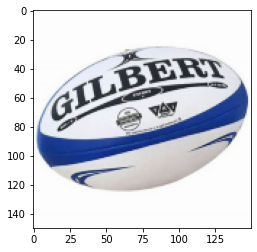

time: 12.5 s (started: 2021-06-09 09:05:29 +00:00)


In [20]:
model = pickle.load(open('img_model.p','rb'))
flat_data =[]
url = input("Enter the image url")
img = imread(url)
img_resized = resize ( img, (150 , 150, 3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict (flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out} ')